# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [6]:
# Output File (CSV)
output_data_file = 'output_data/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# Base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'

# List to hold response info
city_list = []


i = 0
set_count = 1
for index, city in enumerate(cities):
    i +=1
    query_url = url +'appid=' + weather_api_key +'&q='+ city + '&units=' + units
    response = requests.get(query_url).json()
    #print(response)
    print(f'Processing Record {index} of Set {set_count} | {city}') 
    if response['cod'] == '404':
        print(f'City not found. Skipping...')
    else:
        city_list.append({
            'City': response['name'],
            'Lat': response['coord']['lat'],
            'Lng': response['coord']['lon'],
            'Max Temp': response['main']['temp_max'],
            'Humidity': response['main']['humidity'],
            'Cloudiness': response['clouds']['all'],
            'Wind Speed': response['wind']['speed'],
            'Country': response['sys']['country'],
            'Date': response['dt']
             })
        
    if i == 49:
        i =0
        set_count +=1       

Processing Record 0 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 1 of Set 1 | kismayo
Processing Record 2 of Set 1 | lompoc
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | aanekoski
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | kavieng
Processing Record 7 of Set 1 | constitucion
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | sistranda
Processing Record 10 of Set 1 | lata
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | homer
Processing Record 13 of Set 1 | wajima
Processing Record 14 of Set 1 | wagar
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | bargal
City not found. Skipping...
Processing Record 18 of Set 1 | upernavik
Processing Record 19 of Set 1 | qaanaaq
Processing Record 20 of Set 1 | mecca
Processing Record 21 of Set 1 | nikolskoye
Processing Record 22 of Set 1 | albany
Processing Record 

Processing Record 185 of Set 4 | saskylakh
Processing Record 186 of Set 4 | ranfurly
Processing Record 187 of Set 4 | ust-nera
Processing Record 188 of Set 4 | saleaula
City not found. Skipping...
Processing Record 189 of Set 4 | cidreira
Processing Record 190 of Set 4 | thompson
Processing Record 191 of Set 4 | glace bay
Processing Record 192 of Set 4 | sola
Processing Record 193 of Set 4 | surdila-gaiseanca
Processing Record 194 of Set 4 | antalaha
Processing Record 195 of Set 4 | along
Processing Record 196 of Set 5 | gravelbourg
Processing Record 197 of Set 5 | codrington
Processing Record 198 of Set 5 | bambous virieux
Processing Record 199 of Set 5 | vao
Processing Record 200 of Set 5 | san cristobal
Processing Record 201 of Set 5 | ayame
Processing Record 202 of Set 5 | asyut
Processing Record 203 of Set 5 | varzea da palma
Processing Record 204 of Set 5 | tshikapa
Processing Record 205 of Set 5 | ust-kuyga
Processing Record 206 of Set 5 | maniitsoq
Processing Record 207 of Set 

Processing Record 366 of Set 8 | warqla
City not found. Skipping...
Processing Record 367 of Set 8 | mehran
Processing Record 368 of Set 8 | barawe
City not found. Skipping...
Processing Record 369 of Set 8 | guajara-mirim
City not found. Skipping...
Processing Record 370 of Set 8 | vilyuysk
Processing Record 371 of Set 8 | talnakh
Processing Record 372 of Set 8 | payo
Processing Record 373 of Set 8 | pangody
Processing Record 374 of Set 8 | moranbah
Processing Record 375 of Set 8 | kindu
Processing Record 376 of Set 8 | wanlaweyn
Processing Record 377 of Set 8 | palmer
Processing Record 378 of Set 8 | chegdomyn
Processing Record 379 of Set 8 | san jeronimo
Processing Record 380 of Set 8 | santo antonio do ica
Processing Record 381 of Set 8 | udachnyy
Processing Record 382 of Set 8 | sarangani
Processing Record 383 of Set 8 | alta floresta
Processing Record 384 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 385 of Set 8 | ajdabiya
Processing Record 386 of Set 8 | kar

Processing Record 548 of Set 12 | bastrop
Processing Record 549 of Set 12 | ituni
City not found. Skipping...
Processing Record 550 of Set 12 | east wenatchee
Processing Record 551 of Set 12 | buchanan
Processing Record 552 of Set 12 | itaquyry
Processing Record 553 of Set 12 | yulara
Processing Record 554 of Set 12 | keti bandar
Processing Record 555 of Set 12 | gorno-chuyskiy
City not found. Skipping...
Processing Record 556 of Set 12 | chitungwiza
Processing Record 557 of Set 12 | yar-sale
Processing Record 558 of Set 12 | mount gambier
Processing Record 559 of Set 12 | muros
Processing Record 560 of Set 12 | koupela
Processing Record 561 of Set 12 | samarai
Processing Record 562 of Set 12 | baykit
Processing Record 563 of Set 12 | mirai
Processing Record 564 of Set 12 | banmo
City not found. Skipping...
Processing Record 565 of Set 12 | yumbe
Processing Record 566 of Set 12 | zhanakorgan
Processing Record 567 of Set 12 | port hardy
Processing Record 568 of Set 12 | phuket
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Convert raw data to DataFrame 
weather_data = pd.DataFrame(city_list)
weather_data

# Export the city data into a .csv.
weather_data.to_csv('../output_data/cities.csv', encoding='utf-8', index=False)

# Display the DataFrame
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kismayo,-0.3582,42.5454,82.36,78,99,13.78,SO,1650146868
1,Lompoc,34.6391,-120.4579,68.14,73,100,12.66,US,1650146868
2,New Norfolk,-42.7826,147.0587,58.91,75,100,2.42,AU,1650146868
3,Äänekoski,62.6946,25.8180,30.67,65,25,3.58,FI,1650146868
4,Busselton,-33.6500,115.3333,55.62,76,16,9.19,AU,1650146868
...,...,...,...,...,...,...,...,...,...
550,Merced,37.1666,-120.7516,70.05,39,77,6.89,US,1650146932
551,García,25.8167,-100.5833,101.91,51,36,10.31,MX,1650146932
552,Ous,60.9058,61.5186,27.27,97,100,6.80,RU,1650146932
553,Ligayan,4.6533,119.4706,81.54,80,69,9.15,PH,1650146932


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
# Finding cities with humidity over 100%
humidity_hundred = (len(weather_data.index[weather_data['Humidity']>100]))
print(f' There are {humidity_hundred} cities in this dataframe with humidity > 100%.')

# Getting max Humidity % using .describe
weather_data.describe()

 There are 0 cities in this dataframe with humidity > 100%.


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,5.550000e+02
mean,20.903234,16.707936,58.415928,71.605405,56.257658,8.078739,1.650147e+09
std,33.604863,90.529690,22.070096,21.746429,39.278423,5.941012,7.107085e+01
min,-54.800000,-175.200000,-13.490000,3.000000,0.000000,0.000000,1.650147e+09
25%,-6.932750,-62.372600,43.285000,63.000000,18.000000,3.500000,1.650147e+09
50%,25.533300,20.040300,63.370000,76.000000,62.000000,6.910000,1.650147e+09
75%,50.073500,101.663500,77.180000,88.000000,99.000000,11.295000,1.650147e+09
max,78.218600,179.316700,101.910000,100.000000,100.000000,37.980000,1.650147e+09


In [11]:
## Skipping this step as there are no cities with humidity over 100%

# Make a new DataFrame equal to the city data to drop all humidity outliers by index.

# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# Get the indices of cities that have humidity over 100%.

print(weather_data.index[weather_data['Humidity']>100])

Int64Index([], dtype='int64')


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

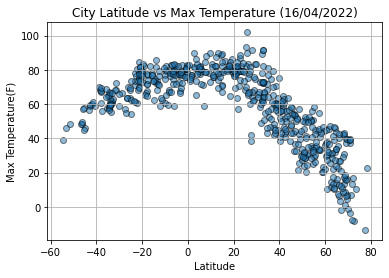

In [12]:
# Latitude vs. Temperature Plot
plt.scatter(weather_data['Lat'], weather_data['Max Temp'], marker='o', alpha=0.5, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs Max Temperature (16/04/2022)')
plt.ylabel('Max Temperature(F)')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig('../output_data/lat_vs_max_temp.png')
plt.show()

## Latitude vs. Humidity Plot

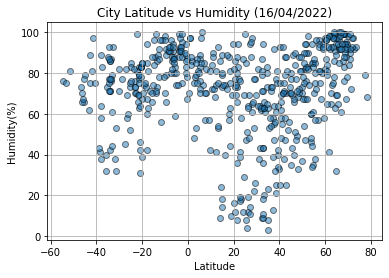

In [13]:
# Latitude vs. Humidity Plot

plt.scatter(weather_data['Lat'], weather_data['Humidity'], marker='o', alpha=0.5, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs Humidity (16/04/2022)')
plt.ylabel('Humidity(%)')
plt.xlabel('Latitude')
#plt.colorbar
plt.grid(True)
plt.savefig('../output_data/lat_vs_humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

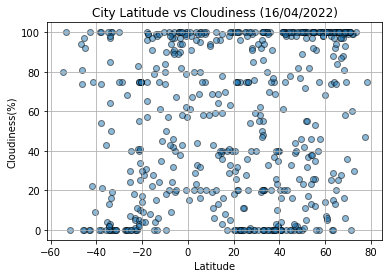

In [14]:
# Latitude vs. Cloudiness Plot
plt.scatter(weather_data['Lat'], weather_data['Cloudiness'], marker='o',alpha=0.5, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs Cloudiness (16/04/2022)')
plt.ylabel('Cloudiness(%)')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig('../output_data/lat_vs_cloud.png')
plt.show()

## Latitude vs. Wind Speed Plot

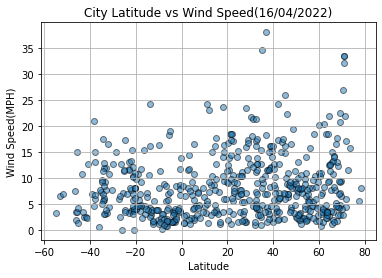

In [15]:
# Latitude vs. Wind Speed Plot
plt.scatter(weather_data['Lat'], weather_data['Wind Speed'], marker='o', alpha=0.5, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs Wind Speed(16/04/2022)')
plt.ylabel('Wind Speed(MPH)')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig('../output_data/lat_vs_wind.png')
plt.show()

## Linear Regression

In [16]:
#Creating variables for Northern Hemisphere cities
north_hemi = weather_data.loc[weather_data['Lat'] >= 0]
north_hemi_cities = len(north_hemi)

# Print Northern Hemisphere cities and DataFrame
print(f'In this dataframe there are {north_hemi_cities} cities in the Northern Hemisphere.')
north_hemi

In this dataframe there are 380 cities in the Northern Hemisphere.


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Lompoc,34.6391,-120.4579,68.14,73,100,12.66,US,1650146868
3,Äänekoski,62.6946,25.8180,30.67,65,25,3.58,FI,1650146868
8,Sistranda,63.7256,8.8340,39.16,86,100,3.42,NO,1650146869
9,Lata,40.1629,-8.3327,51.57,93,20,1.59,PT,1650146869
10,Butaritari,3.0707,172.7902,81.30,78,29,14.32,KI,1650146869
...,...,...,...,...,...,...,...,...,...
550,Merced,37.1666,-120.7516,70.05,39,77,6.89,US,1650146932
551,García,25.8167,-100.5833,101.91,51,36,10.31,MX,1650146932
552,Ous,60.9058,61.5186,27.27,97,100,6.80,RU,1650146932
553,Ligayan,4.6533,119.4706,81.54,80,69,9.15,PH,1650146932


In [17]:
# Creating variables for Southern Hemisphere cities
south_hemi = weather_data.loc[weather_data['Lat']<0]
south_hemi_cities = len(south_hemi)

# Print Southern Hemisphere cities and DataFrame
print(f'In this dataframe there are {south_hemi_cities} cities in the Southern Hemisphere.')
south_hemi

In this dataframe there are 175 cities in the Southern Hemisphere.


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kismayo,-0.3582,42.5454,82.36,78,99,13.78,SO,1650146868
2,New Norfolk,-42.7826,147.0587,58.91,75,100,2.42,AU,1650146868
4,Busselton,-33.6500,115.3333,55.62,76,16,9.19,AU,1650146868
5,Kavieng,-2.5744,150.7967,82.89,75,43,8.41,PG,1650146868
6,Constitución,-35.3333,-72.4167,57.43,73,4,7.29,CL,1650146638
...,...,...,...,...,...,...,...,...,...
520,Antofagasta,-23.6500,-70.4000,61.88,82,18,6.93,CL,1650146799
537,Cabedelo,-6.9811,-34.8339,83.07,82,24,8.52,BR,1650146828
538,Luangwa,-15.6167,30.4167,76.87,70,91,4.03,ZM,1650146930
542,Nísia Floresta,-6.0911,-35.2086,83.21,85,89,5.84,BR,1650146931


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The equation of line is y = -1.04x + 94.93
The r-value is: 0.76


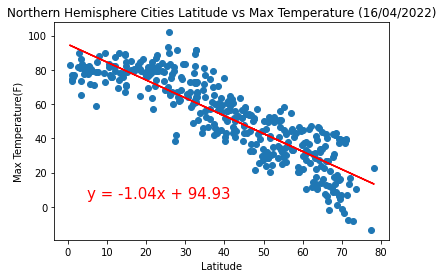

In [31]:
# Creating variable to hold y and x axis
x_values = north_hemi['Lat']
y_values = north_hemi['Max Temp']

# Perform Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The equation of line is {line_eq}')

# Print r value
print(f'The r-value is: {round(rvalue**2, 2)}')

# Plot Linea Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.title('Northern Hemisphere Cities Latitude vs Max Temperature (16/04/2022)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
plt.annotate(line_eq,(5,5), fontsize=15, color='red')

# Save the plotted figure as .png
plt.savefig('../output_data/north_lat_vs_max_temp.png')

# Show the plotted figure
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The equation of line is y = 0.52x + 80.57
The r-value is: 0.54


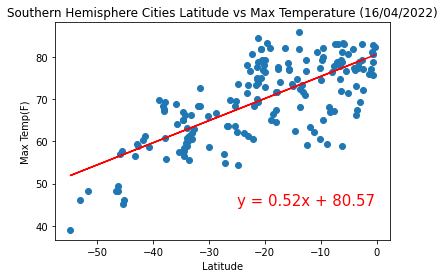

In [19]:
# Creating variable to hold y and x axis
x_values = south_hemi['Lat']
y_values = south_hemi['Max Temp']

# Perform Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The equation of line is {line_eq}')

# Print r value
print(f'The r-value is: {round(rvalue**2, 2)}')

# Plot Linea Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.title('Southern Hemisphere Cities Latitude vs Max Temperature (16/04/2022)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp(F)')
plt.annotate(line_eq,(-25,45), fontsize=15, color='red')

# Save the plotted figure as .png
plt.savefig('../output_data/south_lat_vs_max_temp.png')

# Show the plot
plt.show()

# Observations on Cities in Southern and Northern Hemisphere Max Temp vs Latitude Linear Regression:

#### In the above two scatter plots with linear regression lines analysing the relationship between Max Temp vs Latitude the data shows

 - there is somewhat of a positive linear relationship with Max Temp and Latitudes in the Northern Hemisphere cities with an r-value of 0.76
 - there is somewhat of a positive linear relationship with Max Temp and Latitudes in the Southern Hemisphere cities with an r-value of 0.54

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The equation of line is y = 0.35x + 55.43
The r-value is: 0.09


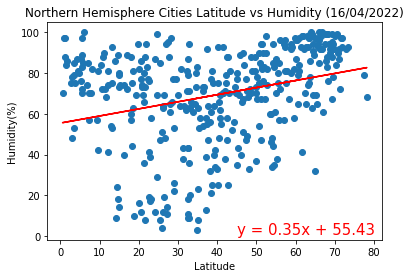

In [32]:
# Creating variable to hold y and x axis
x_values = north_hemi['Lat']
y_values = north_hemi['Humidity']

# Perform Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The equation of line is {line_eq}')

# Print r value
print(f'The r-value is: {round(rvalue**2, 2)}')

# Plot Linea Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.title('Northern Hemisphere Cities Latitude vs Humidity (16/04/2022)')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.annotate(line_eq,(45,1), fontsize=15, color='red')

# Save the plotted figure as .png
plt.savefig('../output_data/north_lat_vs_humidity.png')

# Show the plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The equation of line is y = 0.46x + 85.9
The r-value is: 0.16


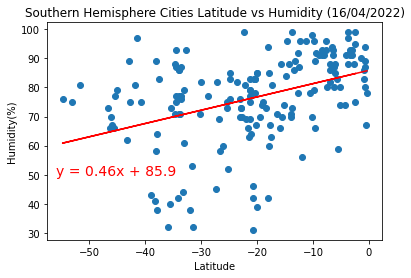

In [33]:
# Creating variable to hold y and x axis
x_values = south_hemi['Lat']
y_values = south_hemi['Humidity']

# Perform Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The equation of line is {line_eq}')

# Print r value
print(f'The r-value is: {round(rvalue**2, 2)}')

# Plot Linea Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.title('Southern Hemisphere Cities Latitude vs Humidity (16/04/2022)')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.annotate(line_eq,(-56,50), fontsize=14, color='red')

# Save the plotted figure as .png
plt.savefig('../output_data/south_lat_vs_humidity.png')

# Show the plotted figure
plt.show()

# Observations Southern Hemisphere and Northern Hemisphere Humidity vs Latitude Linear Regression:

#### In the above two scatter plots with linear regression lines analysing the relationship between Humidity vs Latitude the data shows

 - no linear relationship with Humidity and Latitudes in the Northern Hemisphere cities with an r-value of 0.09
 - no linear relationship with Humidity and Latitudes in the Southern Hemisphere cities with an r-value of 0.016

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The equation of line is y = 0.39x + 43.71
The r-value is: 0.04


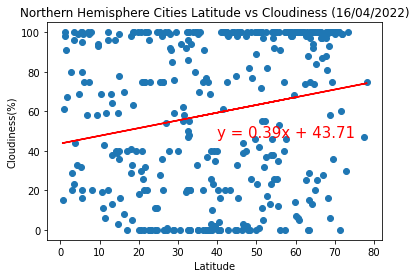

In [38]:
# Creating variable to hold y and x axis
x_values = north_hemi['Lat']
y_values = north_hemi['Cloudiness']

# Perform Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The equation of line is {line_eq}')

# Print r value
print(f'The r-value is: {round(rvalue**2, 2)}')

# Plot Linea Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.title('Northern Hemisphere Cities Latitude vs Cloudiness (16/04/2022)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.annotate(line_eq,(40, 47), fontsize=15, color='red')

# Save the plotted figure as .png
plt.savefig('../output_data/north_lat_vs_cloudiness.png')

# Show the plotted figure
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.8x + 66.13
The r-value is: 0.08


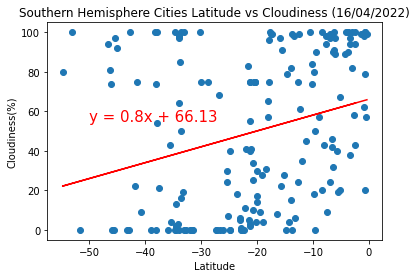

In [25]:
# Creating variable to hold y and x axis
x_values = south_hemi['Lat']
y_values = south_hemi['Cloudiness']

# Perform Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(line_eq)

# Print r value
print(f'The r-value is: {round(rvalue**2, 2)}')

# Plot Linea Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.title('Southern Hemisphere Cities Latitude vs Cloudiness (16/04/2022)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.annotate(line_eq,(-50,55), fontsize=15, color='red')

#Save the plotted figure as .png
plt.savefig('../output_data/south_lat_vs_cloudiness.png')

# Show the plotted figure
plt.show()

# Observations Southern Hemisphere and Northern Hemisphere Cloudiness vs Latitude Linear Regression:


#### In the above two scatter plots with linear regression lines analysing the relationship between Humidity vs Latitude the data shows

 - no linear relationship with Cloudiness and Latitudes in the Northern Hemisphere cities with an r-value of 0.04
 - no linear relationship with Cloudiness and Latitudes in the Southern Hemisphere cities with an r-value of 0.08

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The equation of line is y = 0.02x + 8.11
The r-value is: 0.003


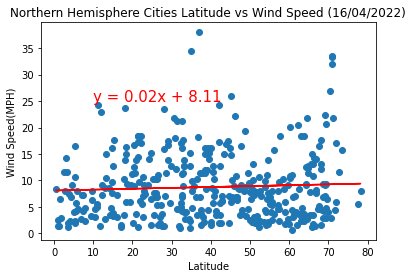

In [28]:
# Creating variable to hold y and x axis
x_values = north_hemi['Lat']
y_values = north_hemi['Wind Speed']

# Perform Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The equation of line is {line_eq}')

# Print r value
print(f'The r-value is: {round(rvalue**2, 3)}')

# Plot Linea Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.title('Northern Hemisphere Cities Latitude vs Wind Speed (16/04/2022)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(MPH)')
plt.annotate(line_eq,(10,25), fontsize=15, color='red')

# Save the plotted figure as .png
plt.savefig('../output_data/north_lat_vs_wind_speed.png')

# Show the plotted figure
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The equation of line is y = -0.07x + 5.23
The r-value is: 0.04


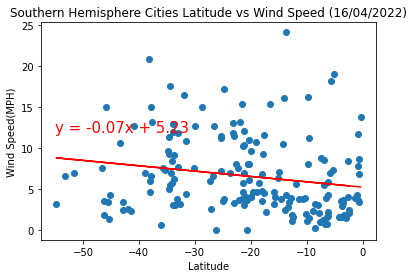

In [29]:
# Creating variable to hold y and x axis
x_values = south_hemi['Lat']
y_values = south_hemi['Wind Speed']

# Perform Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The equation of line is {line_eq}')

# Print r value
print(f'The r-value is: {round(rvalue**2, 2)}')

# Plot Linea Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.title('Southern Hemisphere Cities Latitude vs Wind Speed (16/04/2022)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(MPH)')
plt.annotate(line_eq,(-55, 12), fontsize=15, color='red')

# Save the plotted figure as .png
plt.savefig('../output_data/south_lat_vs_wind_speed.png')

# Show the plotted figure
plt.show()

## Observations Southern Hemisphere and Northern Hemisphere Wind Speed vs Latitude Linear Regression:


#### In the above two scatter plots with linear regression lines analysing the relationship between Humidity vs Latitude the data shows

 - no linear relationship with Wind Speed and Latitudes in the Northern Hemisphere cities with an r-value of 0.003
 - no linear relationship with Wind Speed and Latitudes in the Southern Hemisphere cities with an r-value of 0.04

# WeatherPy Analysis

- The strongest positive linear relationship in all the above plots is between Max Temp and Latitude for both Nortern and Southern Hemisphere.

- The random sampling generated 175 cities in the Southern Hemisphere and 380 cities in the Northern Hemisphere. This seems disproportionate and could skew the results. After investigating further I found that this is due to the Northern Hemisphere having more land area than the Southern Hemisphere as well as the majority of the world's population and largest cities are in the Northern Hemisphere. The random cities were generated using citipy. A better distribution across both hemispheres could give a different result.
